# RETAIL PRICE OF COMMODITIES DATA PREDICTION 

## By Madhu Patil

## Statsly Analytics

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Food Dataset

In [2]:
food=pd.read_csv('Monthly_Food_Retail_Prices.csv')

In [3]:
food.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN


In [36]:
food.shape

(1147446, 8)

There are 1147446 rows and 8 columns.

In [37]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147446 entries, 0 to 1147445
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   State         1147446 non-null  object 
 1   Centre        1147446 non-null  object 
 2   Commodity     1137726 non-null  object 
 3   Variety       941868 non-null   object 
 4   Unit          1147446 non-null  object 
 5   Category      1147446 non-null  object 
 6   Date          1147446 non-null  object 
 7   Retail Price  578525 non-null   float64
dtypes: float64(1), object(7)
memory usage: 70.0+ MB


* We have 1147446 rows & some null values present. 
* All the attributes have Object datatype except the Retail Price having the float datatype

In [38]:
food.describe()

,Retail Price
count,578525.000000
mean,79.691448
std,148.780859
min,0.500000
25%,18.000000
50%,35.000000
75%,80.000000
max,20045.000000


Retail Price varies from 0.50 to 20045 

## Data Cleaning

In [4]:
# splitting the Date column into Month & Year
food[["Month","Year"]] = food['Date'].str.split('-', n = 1, expand = True)

def split_Date(val):
    mon = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9,'OCT':10, 'NOV':11, 'DEC':12}
    return mon[val]

food["Month"] = food["Month"].apply(split_Date)

In [43]:
food.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.0,1,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.0,1,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.5,1,2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,NaN,1,2001


## Dropping Unwanted Columns

In [5]:
food.drop(['Category'], axis = 1, inplace = True)

In [6]:
food.drop(['Date'], axis = 1, inplace = True)

In [46]:
food.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,24.0,1,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,26.0,1,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,25.5,1,2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,NaN,1,2001


## Checking for Null Values

In [47]:
food.isna().sum()

State                0
Centre               0
Commodity         9720
Variety         205578
Unit                 0
Retail Price    568921
Month                0
Year                 0
dtype: int64

In [48]:
food.isna().mean().round(4)*100 

State            0.00
Centre           0.00
Commodity        0.85
Variety         17.92
Unit             0.00
Retail Price    49.58
Month            0.00
Year             0.00
dtype: float64

In [7]:
val_data = food[["State", "Centre", "Commodity", "Variety", "Unit", "Retail Price", "Month", "Year"]][food["Retail Price"].isnull()]

In [50]:
val_data.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,NaN,1,2001
5,Assam,Dibrugarh,Moong,Split,Kg.,NaN,1,2001
6,Assam,Dispur,Moong,Split,Kg.,NaN,1,2001
7,Assam,Guwahati,Moong,Split,Kg.,NaN,1,2001


In [51]:
val_data.shape

(568921, 8)

In [8]:
food.dropna(inplace = True)

In [53]:
food.isnull().sum()

State           0
Centre          0
Commodity       0
Variety         0
Unit            0
Retail Price    0
Month           0
Year            0
dtype: int64

In [54]:
food.shape

(467872, 8)

## Checking for Duplicates

In [13]:
food.duplicated().sum()

2517

There are 2517 duplicates in the dataset

In [9]:
food=food.drop_duplicates(keep='first') #dropping duplicates

In [15]:
food.shape

(1144929, 8)

# EDA

In [16]:
from pandas_profiling import ProfileReport

In [17]:
profile = ProfileReport(food, title="Pandas Profiling Report")

In [18]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
#value count for each column
for i in food.columns:
    print("Column Name", i, "\n", "\n", food[i].value_counts())

Column Name State 
 
 Uttar Pradesh        82377
Tamil Nadu           82377
Madhya Pradesh       81891
Rajasthan            69012
Maharashtra          67554
West Bengal          67068
Karnataka            54918
Andhra Pradesh       54675
Gujarat              53946
Assam                52974
Bihar                51516
Union Territories    44469
Kerala               40824
Punjab               40095
Orissa               39366
Uttarakhand          27216
Jammu Kashmir        26487
Haryana              26487
Jharkhand            26001
Himachal Pradesh     24786
Nagaland             13851
Sikkim               13851
Goa                  13851
Telangana            13851
National Capital     13608
Meghalaya            13608
Arunachal Pradesh    13122
Tripura              12879
Mizoram              12636
Manipur              12150
Name: State, dtype: int64
Column Name Centre 
 
 Tumkur        13851
Madurai       13851
Kohima        13851
Coimbatore    13851
Panaji        13851
              ...  

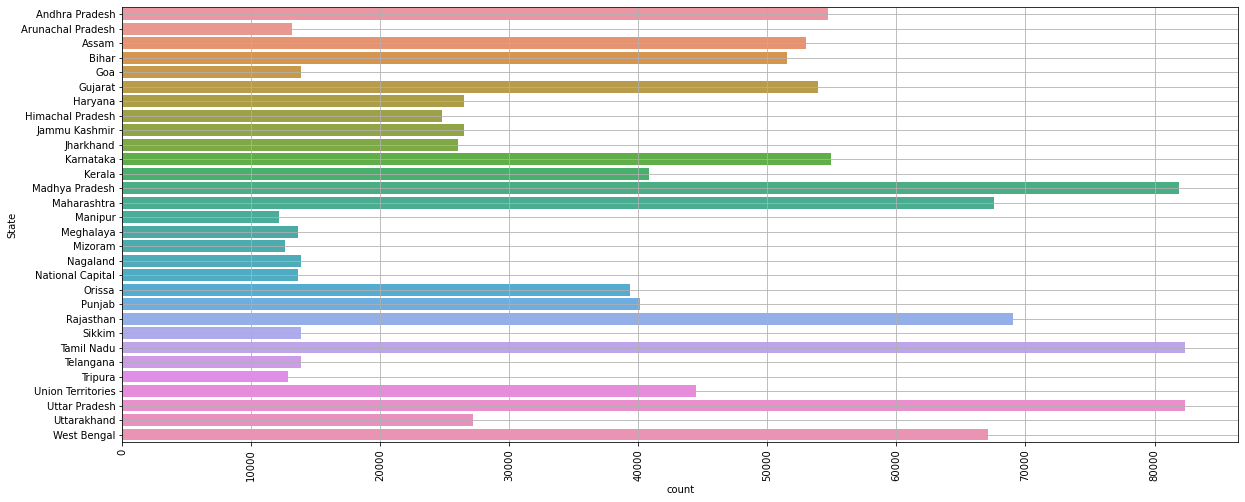

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(data=food, y='State')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

From above graph we see that state Uttar Pradesh, Tamil Nadu and Madhya Pradesh have highest sale in Food  

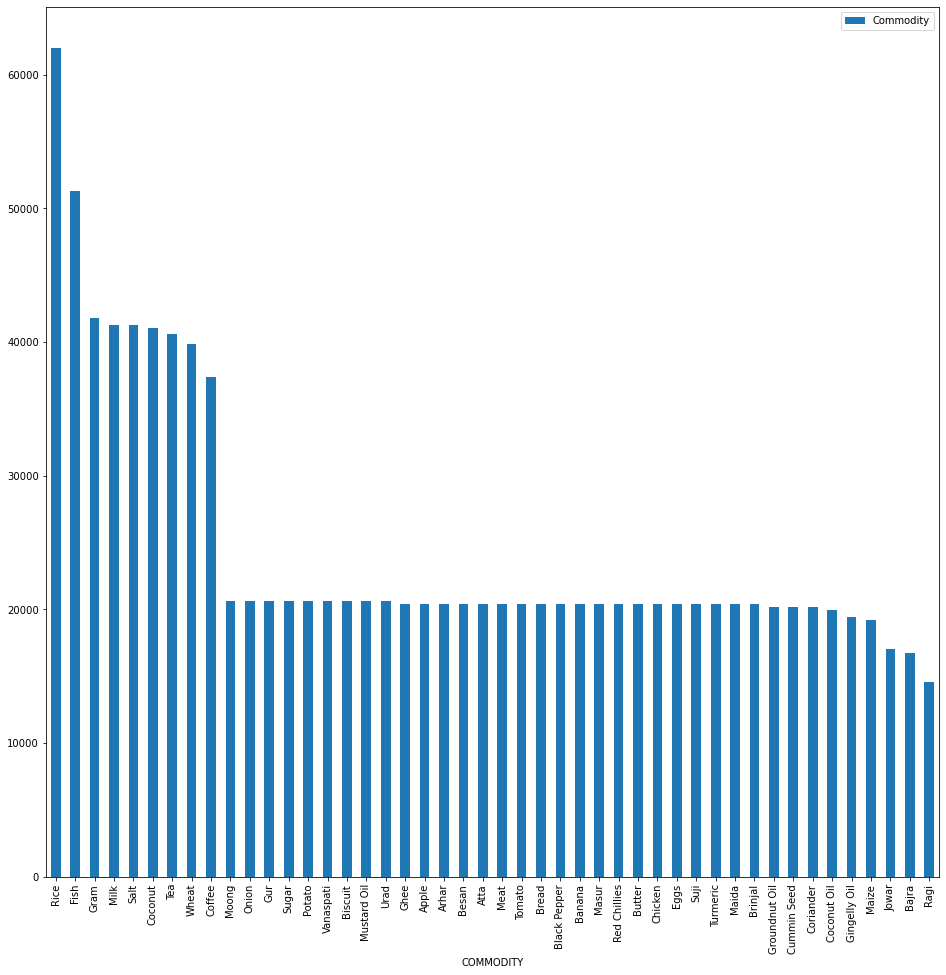

In [16]:
plt.figure(figsize=(16,16))
food['Commodity'].value_counts().plot(kind="bar")
plt.xlabel("COMMODITY")
plt.legend()
plt.show()

 Rice commodity has the higest sale and the least sale is for Ragi 

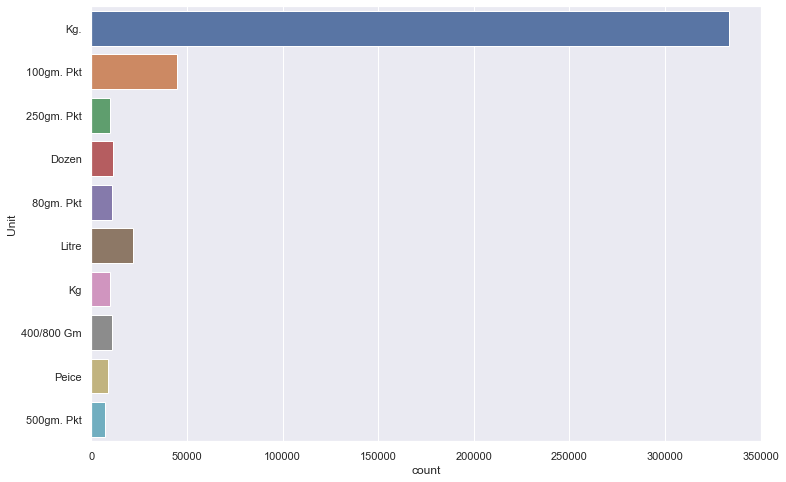

In [12]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
x=sns.countplot(y='Unit',data=food)

* Among all the units Kg is the most used unit to measure

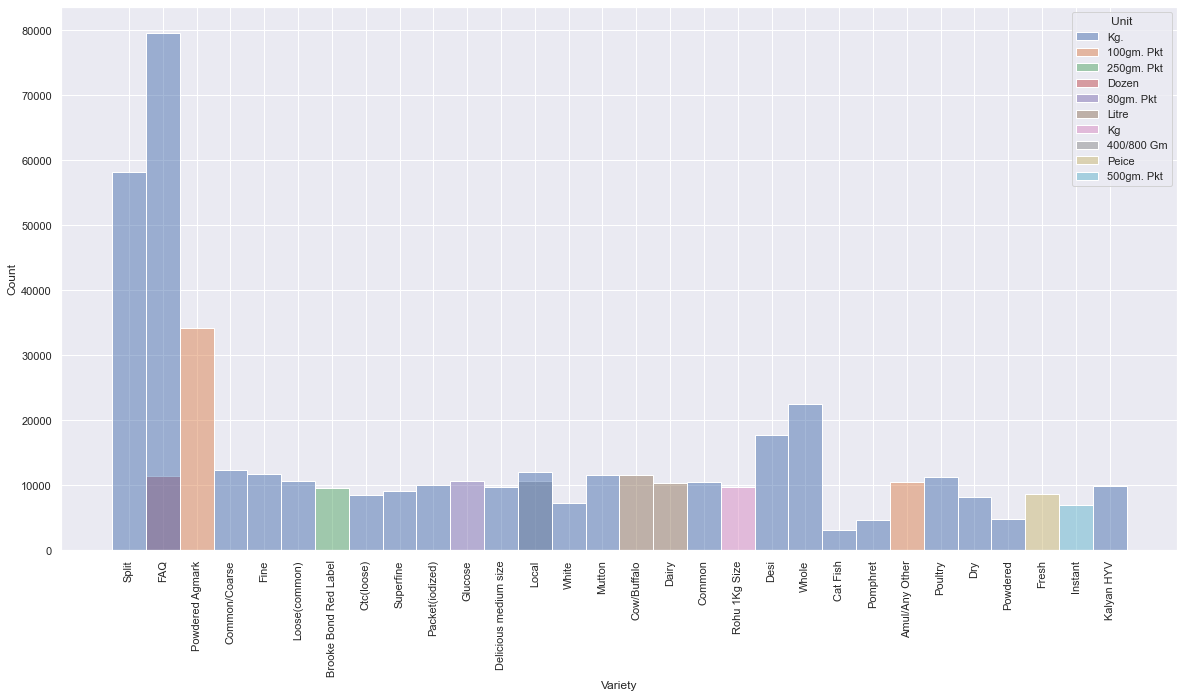

In [55]:
plt.figure(figsize=(20,10))
sns.histplot(data=food,x='Variety', hue='Unit')
plt.xticks(rotation=90)
plt.show()

* Most of the Variety use Kg as unit 
* Amul and Powdered Agmark uses 100gm.Pkt
* Fresh uses Peice to measure 

<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

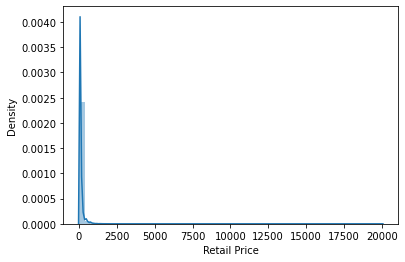

In [18]:
sns.distplot(food['Retail Price'])

From graph we can see that Retail Price is highly skewed, ranging from 0 to 20000 

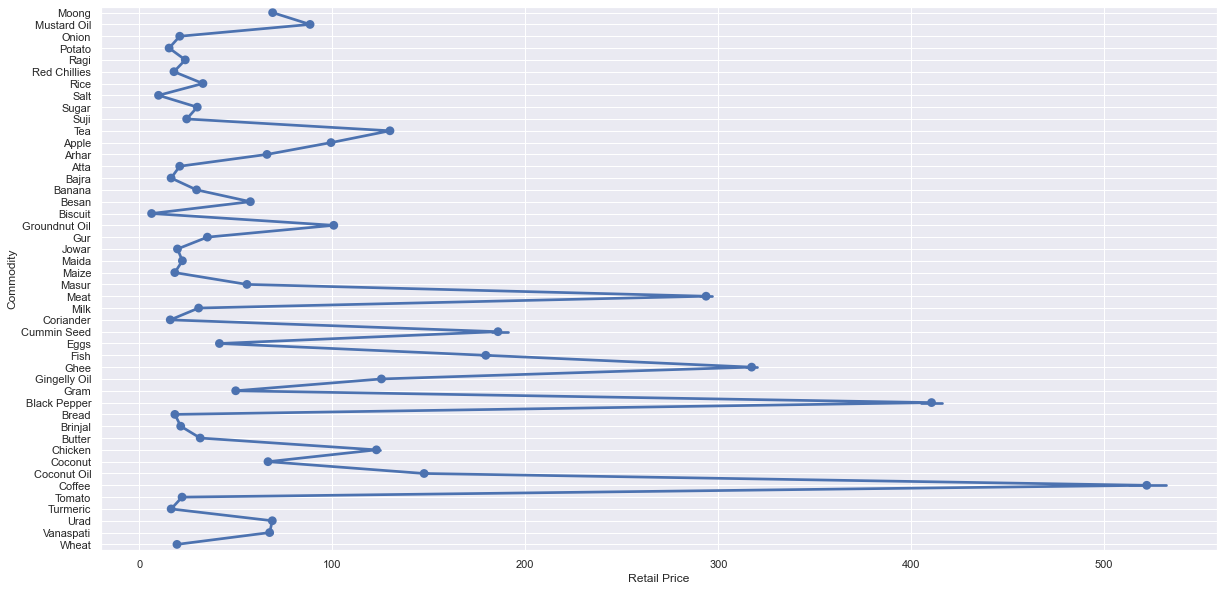

In [20]:
plt.figure(figsize=(20,10))
sns.pointplot(food["Retail Price"], food["Commodity"])
plt.grid(True)
plt.show()

* Coffee has the higest Retail Price. 
* Biscuit and Salt price is lower.

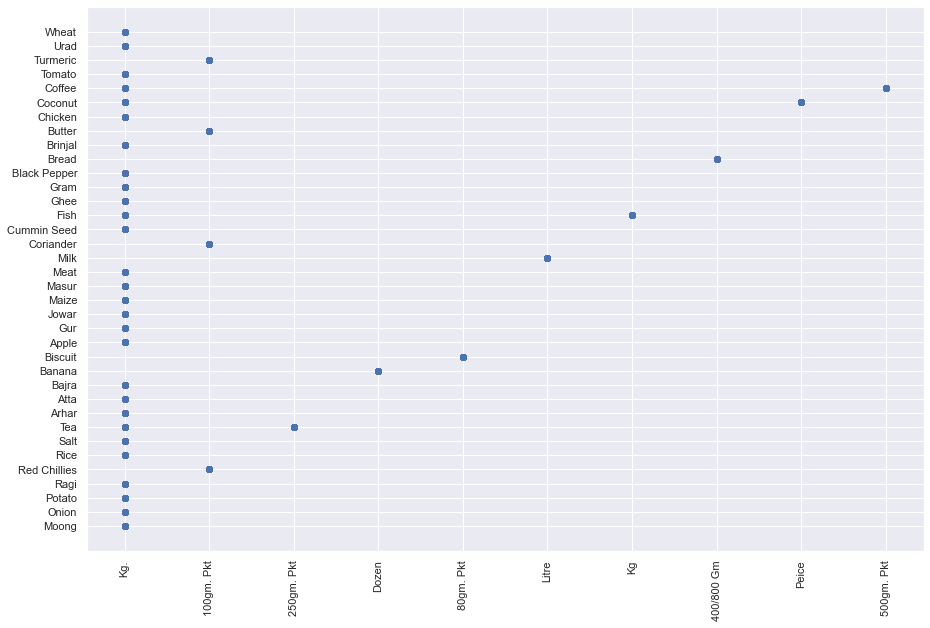

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(data=food,y="Commodity",x="Unit")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

* Most of the commodity uses unit Kg to measure. 
* Coffee is measured with Kg as well as 500gm.Pkt.
* Milk is measured with Litre. 
* Banana is measured with Dozen

In [26]:
group=food.groupby(["Variety","Commodity"]).mean().head(20)
group

Retail Price
Variety               Commodity                
Amul/Any Other        Butter          54.896335
                      Rice            47.861948
Brooke Bond Red Label Tea             78.437352
Cat Fish              Fish           106.056164
Common                Cummin Seed    134.811478
                      Rice            97.041518
Common/Coarse         Rice            45.119374
Cow/Buffalo           Milk            52.590974
Ctc(loose)            Tea            125.986327
Dairy                 Milk            54.563157
Delicious medium size Apple           89.004042
                      Rice            75.600975
Desi                  Ghee           208.113394
                      Rice           194.861948
                      Wheat           59.264449
Dry                   Coconut         92.838730
FAQ                   Atta            46.680124
                      Bajra           50.918756
                      Banana          51.694065
                      Besan           67.958660

<AxesSubplot:xlabel='Commodity'>

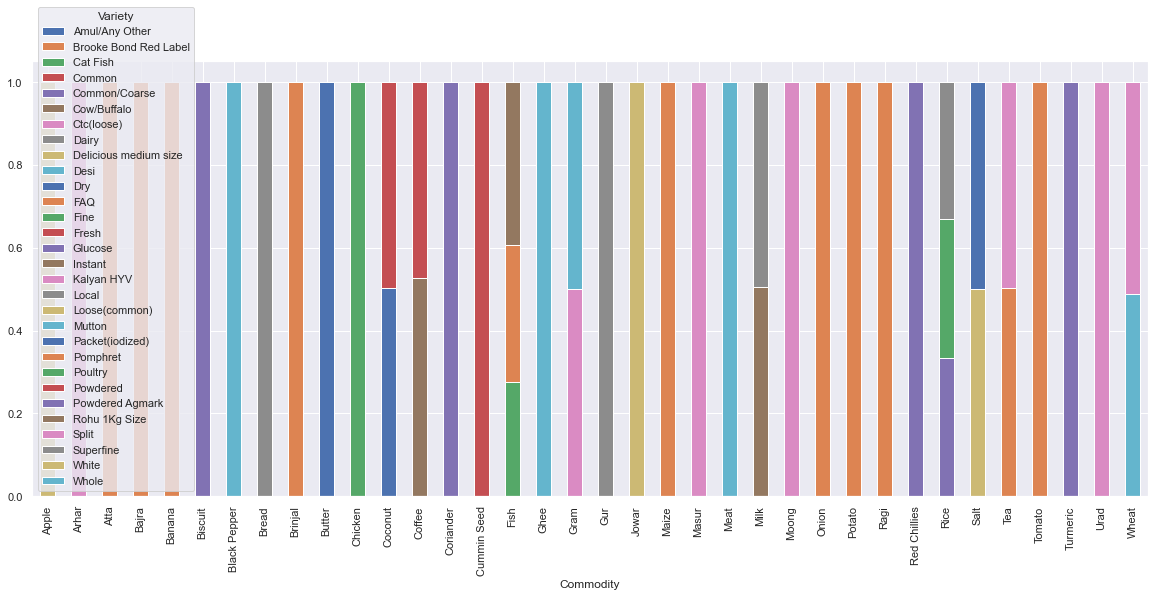

In [22]:
Self_Employed = pd.crosstab(food['Commodity'], food['Variety'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

The above graph interprets the commodity and the different form of Variety they have.
* Commodities such as Onion, Potato, Ragi Tomato, Maize, Brinjal, Aata, Bajra, Banana has FAQ as Variety. 
* Commodities such as Red Chillies, Tumeric, Coriander are in to Powdered Agmark 

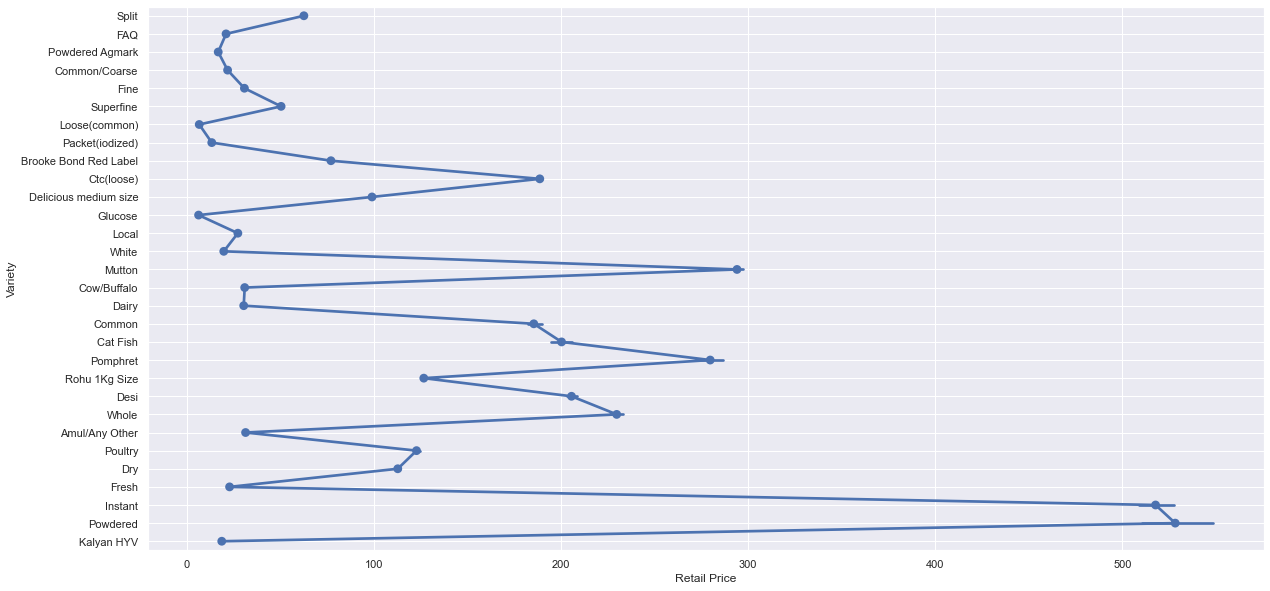

In [23]:
plt.figure(figsize=(20,10))
sns.pointplot(food["Retail Price"], food["Variety"])
plt.grid(True)
plt.show()

* Powered and instant has the higest Retail Price ie greater than 500
* Loose and Glucose has the least Retail Price ie less than 10

<AxesSubplot:xlabel='Commodity'>

<Figure size 576x1080 with 0 Axes>

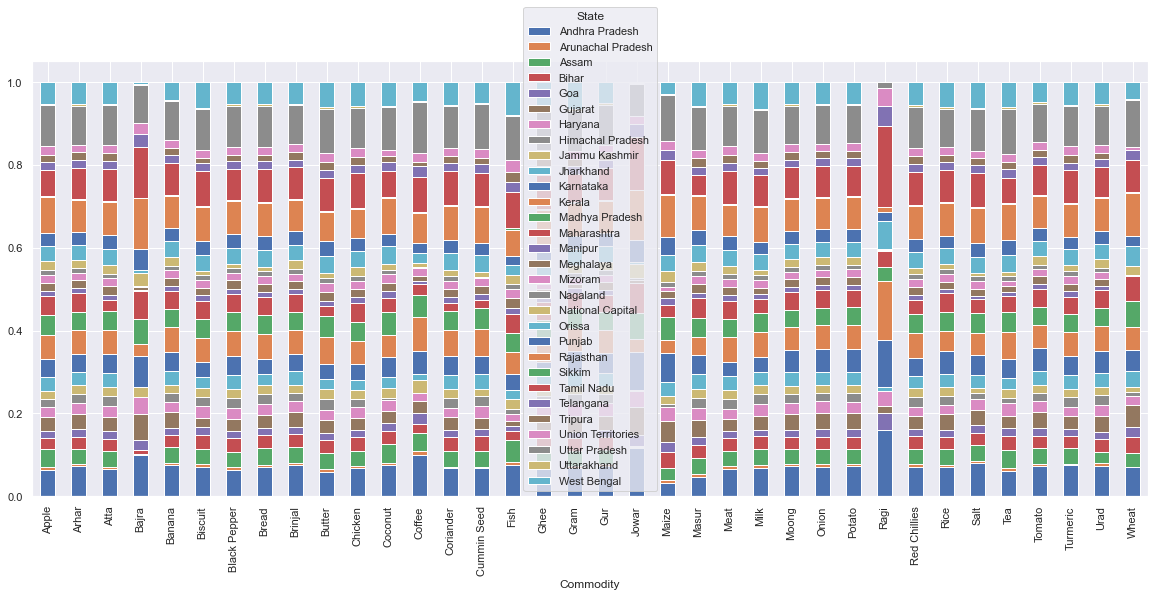

In [17]:
plt.figure(figsize=(8,15))
Self_Employed = pd.crosstab(food['Commodity'], food['State'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (20, 8))

Above plot interprets that, Ragi was least sold in state Madhya Pradesh and Orissa. Whereas it had the higest sale in Punjab, Bihar and Kerla

In [30]:
Rices=food[food["Retail Price"]<20].sort_values(by="State",ascending=False)
Rices.head(5)

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
384678,West Bengal,Kolkata,Atta,FAQ,Kg.,Food,JUN-2012,17.0
254426,West Bengal,Malda,Rice,Packet(iodized),Kg.,Food,NOV-2017,17.0
255673,West Bengal,Asansol,Salt,Packet(iodized),Kg.,Food,DEC-2017,17.0
255672,West Bengal,Asansol,Salt,Loose(common),Kg.,Food,DEC-2017,12.0
255108,West Bengal,Malda,Rice,FAQ,Kg.,Food,DEC-2017,9.0


<AxesSubplot:xlabel='count', ylabel='Year'>

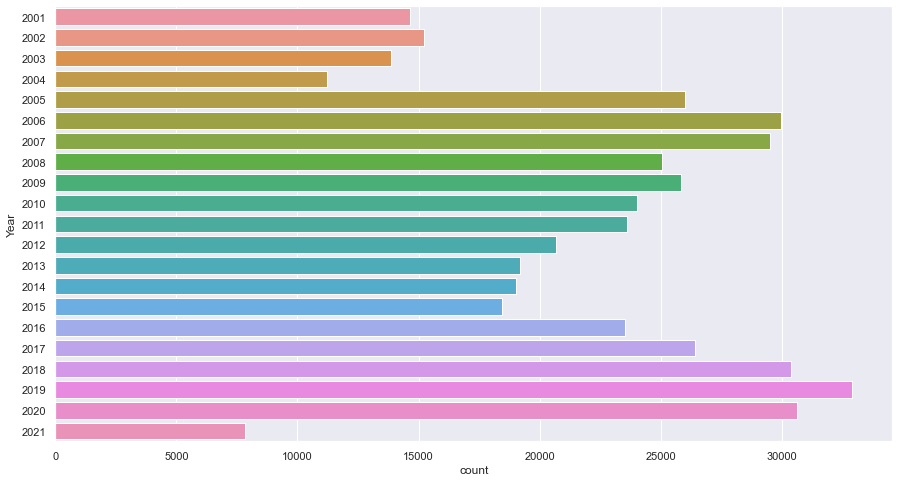

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(data=food, y='Year')

Year 2019 has Higest sale  more than 30,000 whereas in 2021 there is a measure drop in sales less than 10,000

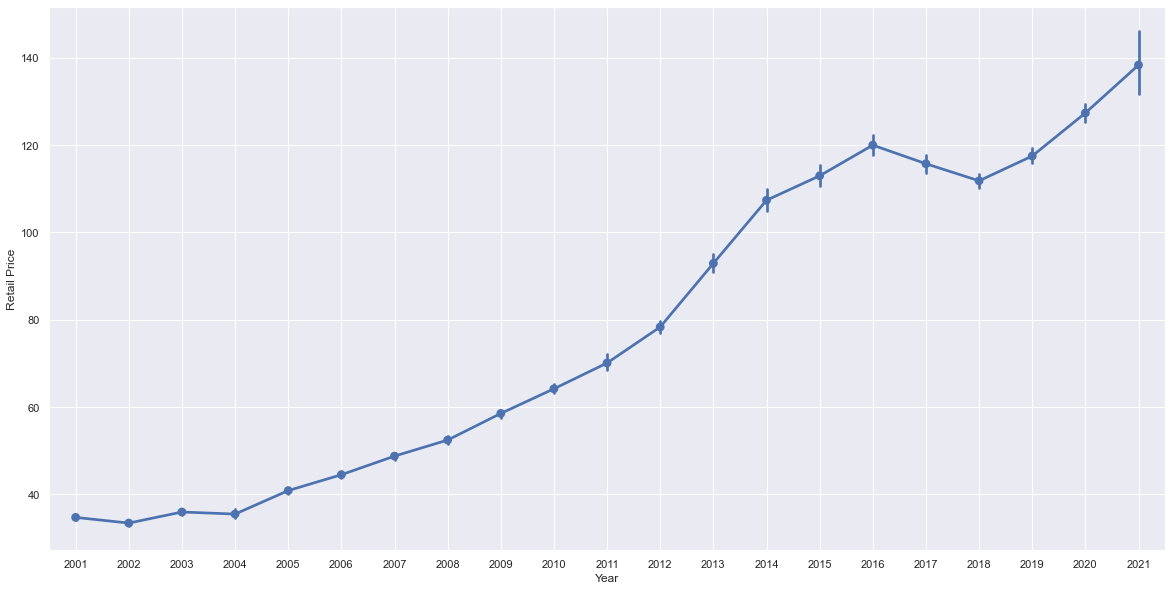

In [25]:
plt.figure(figsize=(20,10))
sns.pointplot(food["Year"], food["Retail Price"])
plt.grid(True)
plt.show()

There is significiant growth in retail price since year 2018. Least price was in year 2002.

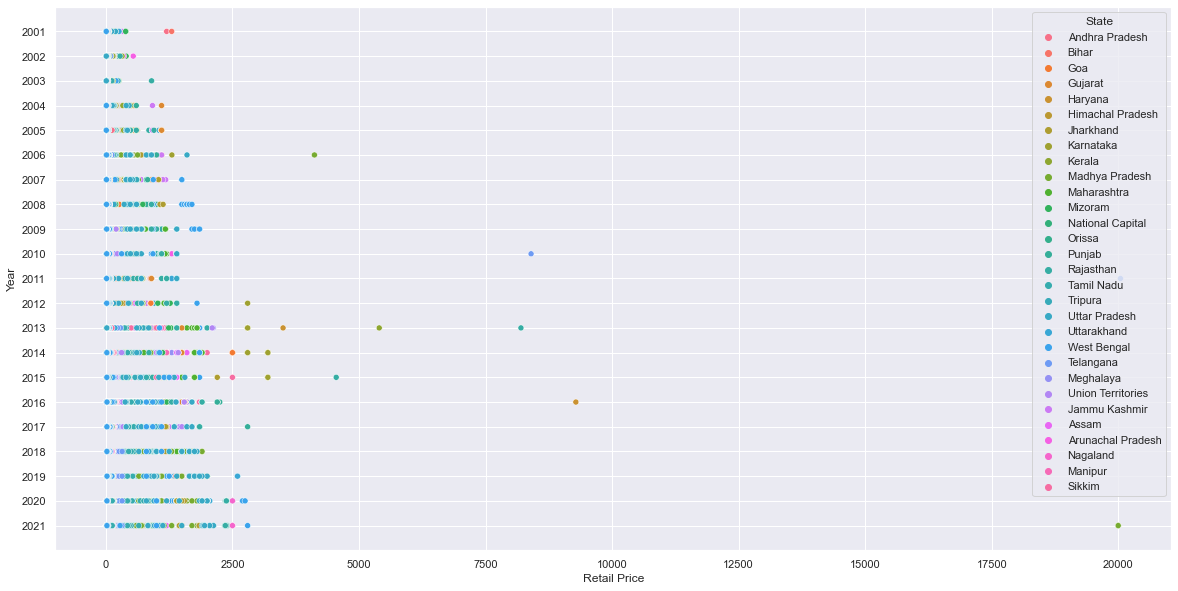

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=food,y='Year',x="Retail Price",hue="State")
plt.grid(True)
plt.plot()
plt.show()

# Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

food['State']  = lb.fit_transform(food['State'])
food['Centre'] = lb.fit_transform(food['Centre'])
food['Commodity'] = lb.fit_transform(food['Commodity'])
food['Variety'] = lb.fit_transform(food['Variety'])
food['Unit'] = lb.fit_transform(food['Unit'])

In [23]:
food.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,24.0,1,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,26.0,1,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,25.5,1,2001
10,Bihar,Hajipur,Moong,Split,Kg.,28.0,1,2001
12,Bihar,Patna,Moong,Split,Kg.,27.0,1,2001


# Skewness

In [64]:
from scipy.stats import skew

In [66]:
skew(food['Retail Price'])

17.30035959347543

<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

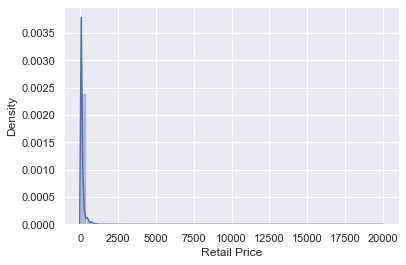

In [67]:
sns.distplot(food['Retail Price'])

We can see that there is a positive skewness

In [68]:
food["Retail Price"]=np.sqrt(food["Retail Price"])

In [69]:
skew(food['Retail Price'])

2.380258801862868

<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

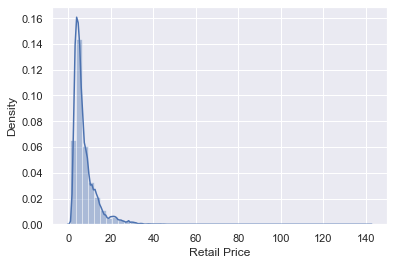

In [70]:
sns.distplot(food['Retail Price'])

# Model Creation

In [72]:
x = food.drop(columns = ['Retail Price'])
y = food['Retail Price']

In [73]:
x

,State,Centre,Commodity,Variety,Unit,Month,Year
0,0,16,24,26,7,1,2001
1,0,29,24,26,7,1,2001
2,0,50,24,26,7,1,2001
10,3,32,24,26,7,1,2001
12,3,61,24,26,7,1,2001
...,...,...,...,...,...,...,...
1147436,29,5,35,9,7,3,2021
1147437,29,5,35,16,7,3,2021
1147438,29,35,35,9,7,3,2021
1147439,29,35,35,16,7,3,2021


In [74]:
y

0          4.898979
1          5.099020
2          5.049752
10         5.291503
12         5.196152
             ...   
1147436    4.582576
1147437    4.690416
1147438    5.000000
1147439    5.196152
1147444    4.472136
Name: Retail Price, Length: 467872, dtype: float64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(327510, 7)
(327510,)
(140362, 7)
(140362,)


#### Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
ypred=linreg.predict(x_test)
ypred

array([ 4.62165372,  9.56615346,  7.75736249, ...,  7.90524287,
       11.4227148 ,  8.26111582])

In [111]:
from sklearn.model_selection import cross_val_score

c = 111111111111111111111
d = 0
for i in range(2,12):
    sc = cross_val_score(linreg, x, y, cv = i, scoring = 'neg_root_mean_squared_error')
    sc = -sc
    print(i,") ",sc.mean())
    if sc.mean()<c:
        c=sc.mean()
        d=i
print('\nBest number of kfolds for cross validation is ',d,'\n')

2 )  5.7981009485999095
3 )  5.239527910841384
4 )  5.519835893728724
5 )  5.321992484890474
6 )  5.069768401865663
7 )  5.19467071837253
8 )  5.0264692854928565
9 )  4.876619423734862
10 )  4.8759017796765995
11 )  4.888837063254972

Best number of kfolds for cross validation is  10 



In [82]:
intercept = print(model.intercept_)
intercept

-548.265998100362


In [84]:
coefficients = pd.DataFrame(model.coef_,x_train.columns,columns=['coefficients'])
coefficients

,coefficients
State,0.007887
Centre,0.000636
Commodity,-0.094997
Variety,0.056177
Unit,0.291054
Month,0.029818
Year,0.275638


In [112]:
from sklearn.metrics import mean_squared_error as mse
print('Mean Square Error (MSE)       :', mse(y_test,ypred))
print('Root mean Square Error (RMSE) :', np.sqrt(mse(y_test,ypred)))

Mean Square Error (MSE)       : 24.01480797905242
Root mean Square Error (RMSE) : 4.9004905855488


In [87]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, x_train,y_train, cv = 11, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[4.93885981 4.89662756 4.90428864 4.93883231 4.91651831 4.94122366
 4.88721037 4.93163987 4.94770577 4.95858211 5.02916666]

Model Report
CV Score : Mean - 4.936 | Std - 0.03656 | Min - 4.887 | Max - 5.029


<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

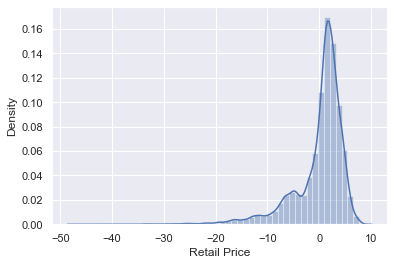

In [113]:
sns.distplot(ypred - y_test)

Text(0.5, 0.98, 'Actual and Predicted')

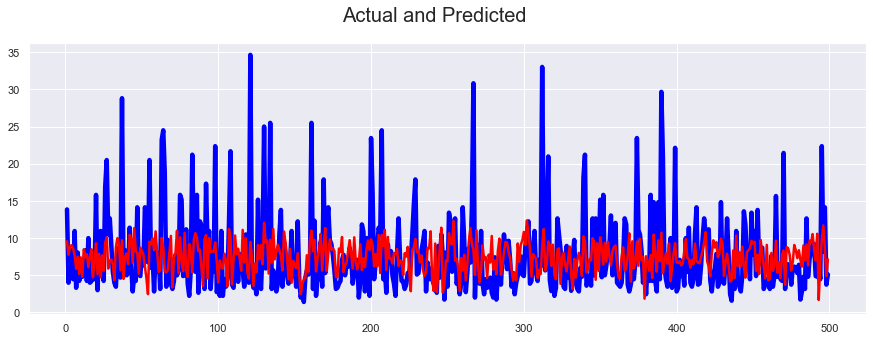

In [89]:
#Actual vs Predicted
# Check for the forst 150 observations

c = [i for i in range(1,500,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:500], color="blue", linewidth=4.5, linestyle="-")
plt.plot(c,ypred[1:500], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)  

In [90]:
from sklearn.metrics import r2_score #checking for r2_score
R_square =r2_score(y_test,ypred)

print('R square :',R_square)

R square : 0.14623678608579405


In [91]:
# n = sample size
n = x_test.shape[0]
# k = no of independent variables
k = x_test.shape[1]
Adj_R2 = 1 - ((n-1)/(n-k-1))*(1- R_square)

print("Adjusted R square :" ,Adj_R2)

Adjusted R square : 0.14619420559291607


In [92]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train.astype(float))
stats_model = sm.OLS(y_train,x_train_sm).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Retail Price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     8000.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:11:10   Log-Likelihood:            -9.8757e+05
No. Observations:              327510   AIC:                         1.975e+06
Df Residuals:                  327502   BIC:                         1.975e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -548.2660      3.018   -181.688      0.000    -554.180    -542.352
State          0.0079      0.001      8.178      0.000       0.006       0.010
Centre         0.0006      0.000      1.790      0.074   -6.06e-05       0.001
Commodity     -0.0950      0.001   -113.154      0.000      -0.097      -0.093
Variety        0.0562      0.001     54.147      0.000       0.054       0.058
Unit           0.2911      0.004     80.007      0.000       0.284       0.298
Month          0.0298      0.002     11.993      0.000       0.025       0.035
Year           0.2756      0.001    183.774      0.000       0.273       0.279
==============================================================================
Omnibus:                   176754.304   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2292134.817
Skew:                           2.323   Prob(JB):                         0.00
Kurtosis:                      15.099   Cond. No.                     7.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
for i in range(20):
    l2=Ridge(alpha=i)
    l2.fit(x_train,y_train)
    print(f"{i}:{l2.score(x_test,y_test)}")

0:0.14623678608579427
1:0.14623678612871505
2:0.1462367861716246
3:0.1462367862145224
4:0.14623678625740888
5:0.1462367863002837
6:0.1462367863431474
7:0.14623678638599946
8:0.1462367864288403
9:0.1462367864716696
10:0.14623678651448724
11:0.14623678655729389
12:0.14623678660008876
13:0.1462367866428722
14:0.14623678668564455
15:0.146236786728405
16:0.14623678677115426
17:0.14623678681389218
18:0.14623678685661867
19:0.1462367868993334


In [115]:
print ("RIDGE REGRESSION")
l2= Ridge(alpha = 1, normalize = True)
l2.fit(x_train,y_train)
predictions = l2.predict(x_test)

mean_square = mse(y_test,predictions)

print('Mean Square Error (MSE)       :', mse(y_test,predictions))
print('Root mean Square Error (RMSE) :', np.sqrt(mse(y_test,predictions)))

cv_score = cross_val_score(l2, x_train,y_train, cv=11, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))

RIDGE REGRESSION
Mean Square Error (MSE)       : 25.029420156433947
Root mean Square Error (RMSE) : 5.002941150606706

 Scores 
[5.04440788 5.00612348 5.0034139  5.03867065 5.01207271 5.05200969
 4.98255778 5.03736236 5.06322925 5.06364652 5.13777134]

Model Report
CV Score : Mean - 5.04 | Std - 0.03977 | Min - 4.983 | Max - 5.138


In [98]:
R_square = metrics.r2_score(y_test,predictions)
print('R square :',R_square)

# n = sample size
n = x_test.shape[0]
# k = no of independent variables
k = x_test.shape[1]
Adj_R2 = 1 - ((n-1)/(n-k-1))*(1- R_square)

print("Adjusted R square :" ,Adj_R2)

R square : 0.1461783842291946
Adjusted R square : 0.1461358008235889


#### Random Forest 

In [116]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 600, max_depth = 6, min_samples_leaf = 120, n_jobs = 5)
RF.fit(x_train,y_train)
RF.pred = RF.predict(x_test)
RF.pred

print('Mean Square Error (MSE)       :', mse(y_test,RF.pred))
print('Root mean Square Error (RMSE) :', np.sqrt(mse(y_test,RF.pred)))
R_square =r2_score(y_test,RF.pred)
print('R square :',R_square)

Mean Square Error (MSE)       : 9.194310216506832
Root mean Square Error (RMSE) : 3.032212099525169
R square : 0.6731281862833854


In [103]:
cv_score = cross_val_score(RF, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[3.26597948 3.01943525 3.08595478 3.04606881 3.12964785 3.03850937
 3.06307204 3.16450431 3.1420841  3.06249219]

Model Report
CV Score : Mean - 3.102 | Std - 0.07105 | Min - 3.019 | Max - 3.266


In [104]:
print('Accuracy for Random Forest',100*max(0,np.sqrt(metrics.mean_squared_error(y_test,RF.pred))))

Accuracy for Random Forest 304.7773537814643


In [105]:
# Performance metrics
errors = abs(RF.pred - y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 1.73 degrees.
Accuracy: 74.38 %.


#### Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(max_depth= 2)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict(x_test)

In [107]:
from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,gbm_pred)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,gbm_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,gbm_pred)))

Mean Square Error (MSE)       : 7.715015831589218
Root mean Square Error (RMSE) : 2.7775917323446255


In [108]:
#KFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
results = cross_val_score(gbm, x_train, y_train, cv = kfold)
print("Accuracy          : " , results.mean()*100)
print("standard deviation: " , results.std()*100)

Accuracy          :  72.265616507543
standard deviation:  0.2905724862436399


# NON Food

In [2]:
nonfood=pd.read_csv('Monthly_Non_Food_Retail_Prices.csv')

In [145]:
nonfood.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN
1,Andhra Pradesh,Guntur,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN
2,Andhra Pradesh,Kurnool,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN
3,Andhra Pradesh,Vishakhapatnam,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN
4,Arunachal Pradesh,Itanagar,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN


In [146]:
nonfood.shape

(749655, 8)

There are 749655 rows and 8 columns.

In [147]:
nonfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749655 entries, 0 to 749654
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   State         749655 non-null  object 
 1   Centre        749655 non-null  object 
 2   Commodity     741150 non-null  object 
 3   Variety       376650 non-null  object 
 4   Unit          749655 non-null  object 
 5   Category      749655 non-null  object 
 6   Date          749655 non-null  object 
 7   Retail Price  151933 non-null  float64
dtypes: float64(1), object(7)
memory usage: 45.8+ MB


In [54]:
nonfood.describe()

,Retail Price
count,151933.000000
mean,95.190386
std,148.597434
min,0.250000
25%,13.000000
50%,32.750000
75%,124.950000
max,4895.000000


## Data Cleaning

In [3]:
nonfood[["Month","Year"]] = nonfood['Date'].str.split('-', n = 1, expand = True)

def split_Date(val):
    mon = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9,'OCT':10, 'NOV':11, 'DEC':12}
    return mon[val]

nonfood["Month"] = nonfood["Month"].apply(split_Date)

In [151]:
nonfood.head()

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN,1,2001
1,Andhra Pradesh,Guntur,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN,1,2001
2,Andhra Pradesh,Kurnool,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN,1,2001
3,Andhra Pradesh,Vishakhapatnam,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Gents Dhoti,Cotton,Per Piece,Non Food,JAN-2001,NaN,1,2001


### Deleting unwanted Columns

In [4]:
nonfood.drop(['Category'], axis = 1, inplace = True)

In [5]:
nonfood.drop(['Date'], axis = 1, inplace = True)

In [154]:
nonfood.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Gents Dhoti,Cotton,Per Piece,NaN,1,2001
1,Andhra Pradesh,Guntur,Gents Dhoti,Cotton,Per Piece,NaN,1,2001
2,Andhra Pradesh,Kurnool,Gents Dhoti,Cotton,Per Piece,NaN,1,2001
3,Andhra Pradesh,Vishakhapatnam,Gents Dhoti,Cotton,Per Piece,NaN,1,2001
4,Arunachal Pradesh,Itanagar,Gents Dhoti,Cotton,Per Piece,NaN,1,2001


# Null values

In [155]:
nonfood.isna().sum()

State                0
Centre               0
Commodity         8505
Variety         373005
Unit                 0
Retail Price    597722
Month                0
Year                 0
dtype: int64

In [156]:
nonfood.isna().mean().round(4)*100

State            0.00
Centre           0.00
Commodity        1.13
Variety         49.76
Unit             0.00
Retail Price    79.73
Month            0.00
Year             0.00
dtype: float64

In [6]:
nonfood.dropna(inplace = True)

In [172]:
nonfood.isnull().sum()

State           0
Centre          0
Commodity       0
Variety         0
Unit            0
Retail Price    0
Month           0
Year            0
dtype: int64

### Checking for Duplicates

In [160]:
nonfood.duplicated().sum()

2394

We have 2394 duplicate values

In [7]:
nonfood=nonfood.drop_duplicates(keep='first')

In [162]:
nonfood.shape

(747261, 8)

# EDA

In [126]:
for i in nonfood.columns:
    print("Column Name", i, "\n", "\n", nonfood[i].value_counts())

Column Name State 
 
 Uttar Pradesh        60993
Tamil Nadu           59049
West Bengal          51030
Rajasthan            50544
Madhya Pradesh       40338
Andhra Pradesh       40095
Maharashtra          40095
Gujarat              39123
Assam                32562
Union Territories    30618
Bihar                30618
Kerala               30375
Punjab               29646
Jharkhand            20412
Haryana              20169
Orissa               19926
Himachal Pradesh     19440
Karnataka            17982
Jammu Kashmir        11664
Arunachal Pradesh    10206
National Capital     10206
Telangana            10206
Goa                  10206
Uttarakhand          10206
Tripura               9963
Mizoram               9963
Meghalaya             9963
Sikkim                9720
Manipur               8991
Nagaland              5346
Name: State, dtype: int64
Column Name Centre 
 
 Tumkur         10206
Delhi          10206
Hajipur        10206
Jalpaiguri     10206
Guwahati       10206
              

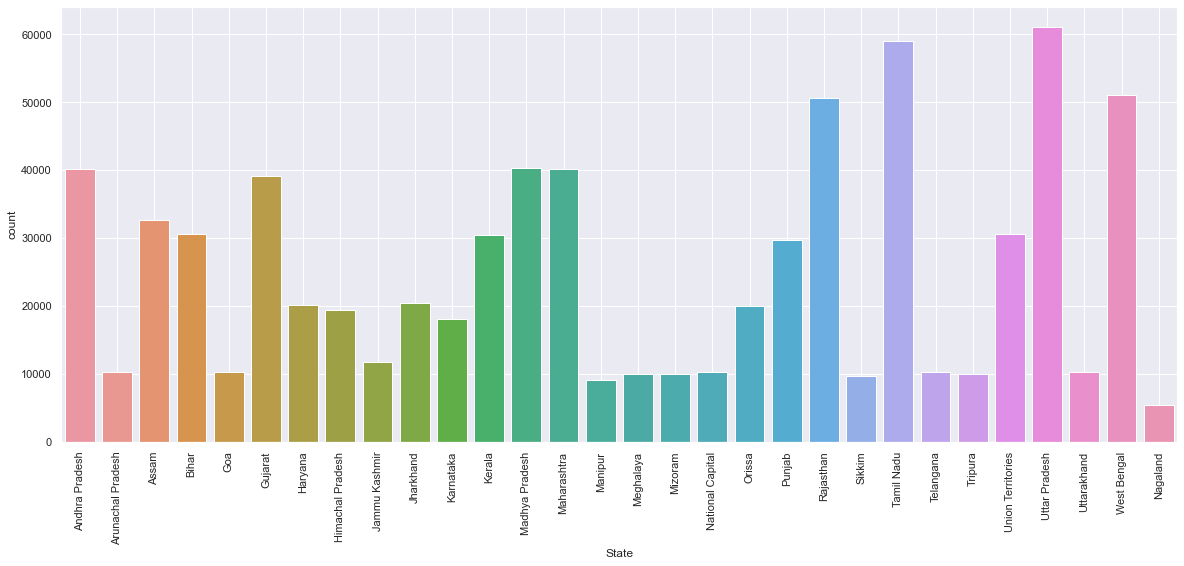

In [128]:
plt.figure(figsize=(20,8))
sns.countplot(data=nonfood, x='State')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

From above graph we see that state Uttar Pradesh and Tamil Nadu have highest sale in nonFood

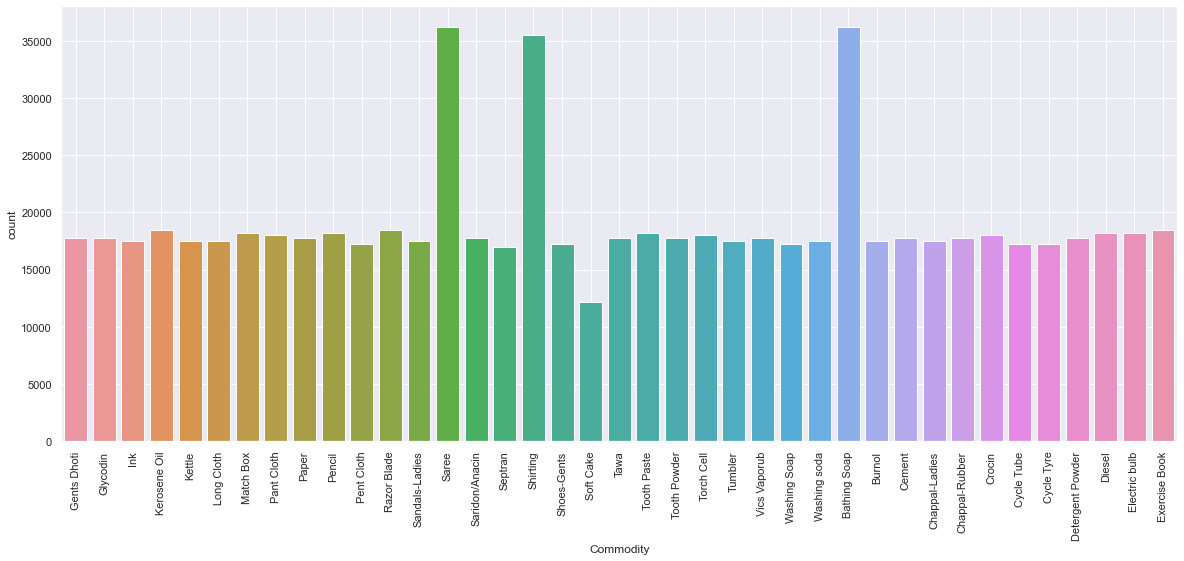

In [127]:
plt.figure(figsize=(20,8))
sns.countplot(data=nonfood, x='Commodity')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Commodities Bathing soap, Shirting and Saree has the higest sale 

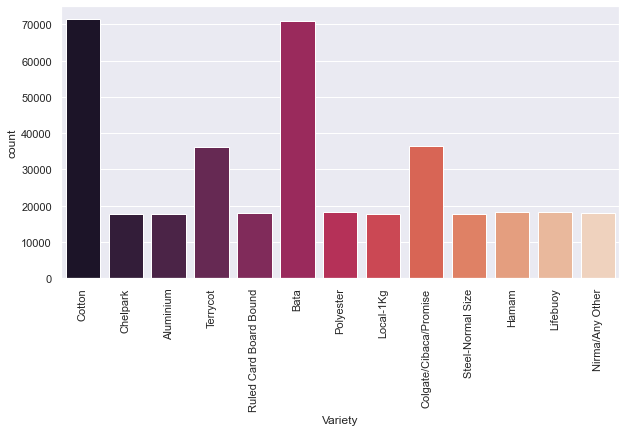

In [129]:
fig, axs = plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(nonfood['Variety'], palette="rocket")
plt.xticks(rotation=90)
plt.show()

Variety such as Bata and cotton are in lead.

In [68]:
group=nonfood.groupby(["Variety","Commodity"]).mean().head(20)
group

Retail Price
Variety                Commodity                   
Aluminium              Bathing Soap       95.867048
                       Kettle            116.591506
Bata                   Bathing Soap      101.089029
                       Chappal-Ladies    115.746203
                       Chappal-Rubber     95.000607
                       Sandals-Ladies    134.392050
                       Shoes-Gents       213.958239
Chelpark               Bathing Soap       93.788075
                       Ink                79.261767
Colgate/Cibaca/Promise Bathing Soap       94.197932
                       Tooth Paste        81.877043
                       Tooth Powder       81.787632
Cotton                 Bathing Soap       93.784541
                       Burnol             82.148616
                       Cement            128.236926
                       Crocin             78.557142
                       Cycle Tube         87.095491
                       Cycle Tyre        100.637298
                       Diesel             83.127746
                       Electric bulb      77.706483

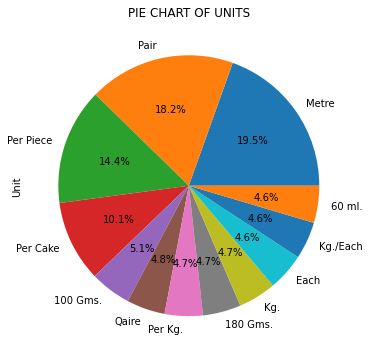

In [8]:
plt.figure(figsize=(6,6))
nonfood["Unit"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("PIE CHART OF UNITS")
plt.show()

most of the nonfood commodities are measured through Metre and pair 

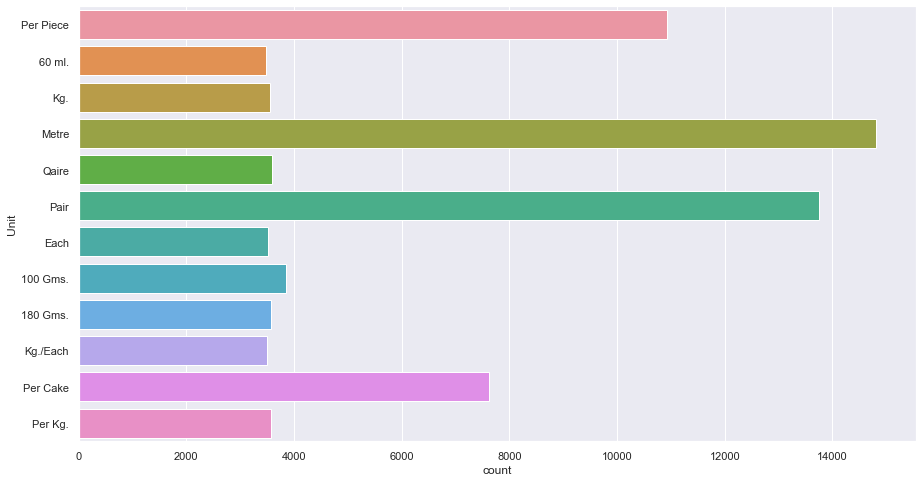

In [12]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
x=sns.countplot(y='Unit',data=nonfood)

most of the nonfood commodities are measured through Metre and pair 

<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

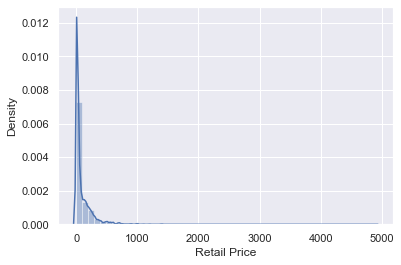

In [131]:
sns.distplot(nonfood['Retail Price'])

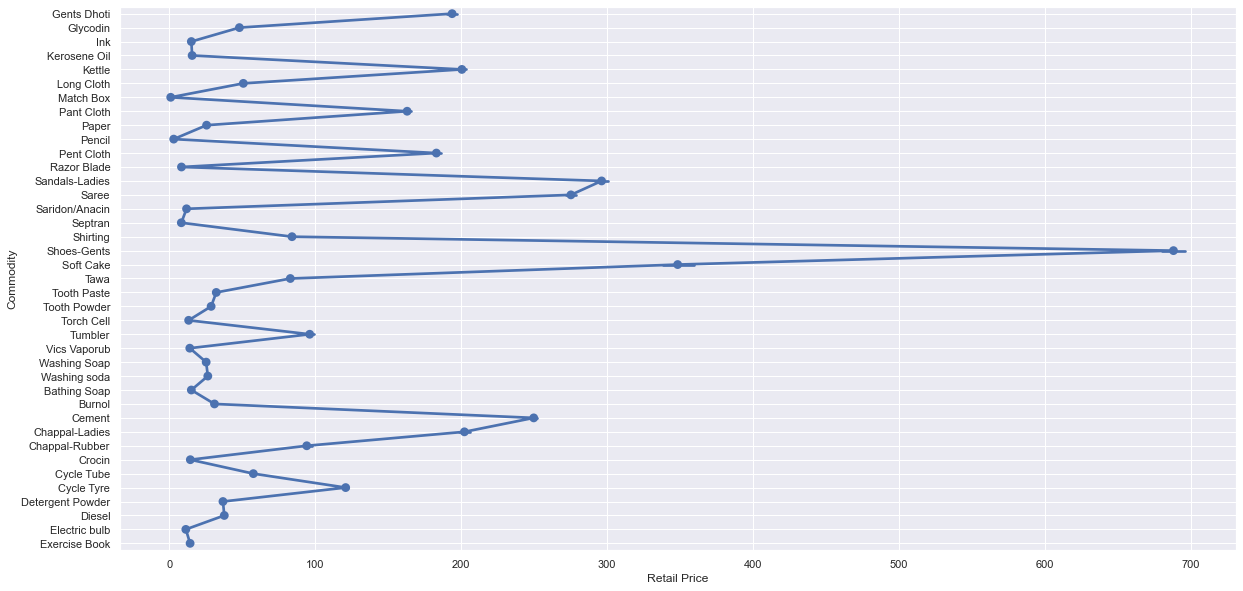

In [132]:
plt.figure(figsize=(20,10))
sns.pointplot(nonfood["Retail Price"], nonfood["Commodity"])
plt.grid(True)
plt.show()

* Shoes-Gents has the higest Retail Price. 
* Pencile and Matchbox has the least price.

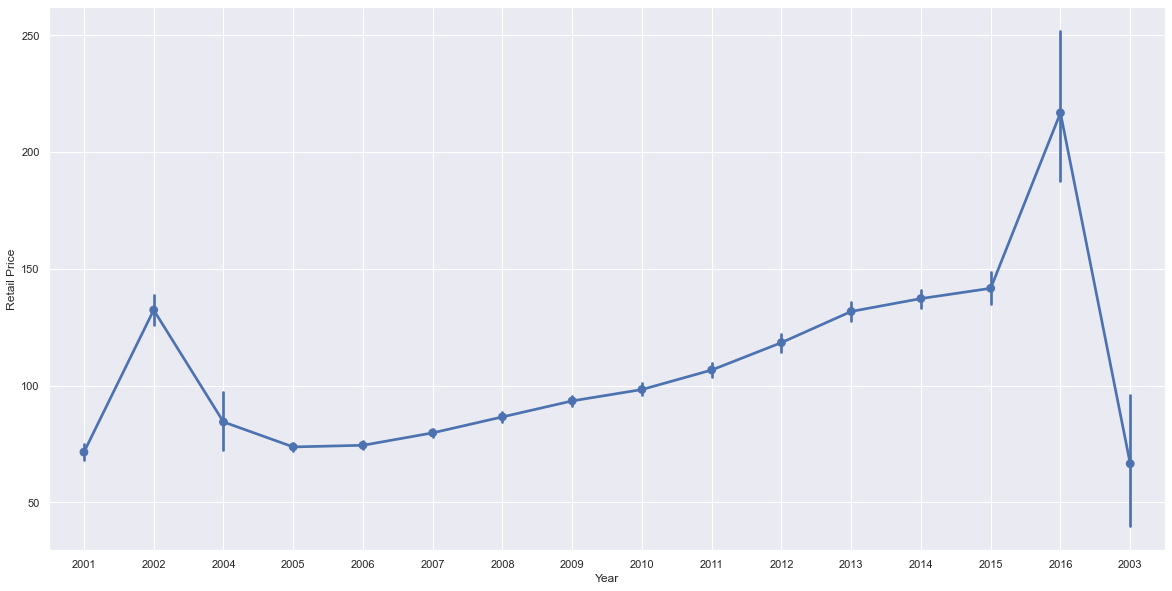

In [174]:
plt.figure(figsize=(20,10))
sns.pointplot(nonfood["Year"], nonfood["Retail Price"])
plt.grid(True)
plt.show()

Year 2016 had the higest retail price. 
Least price was at year 2001 and 2003.

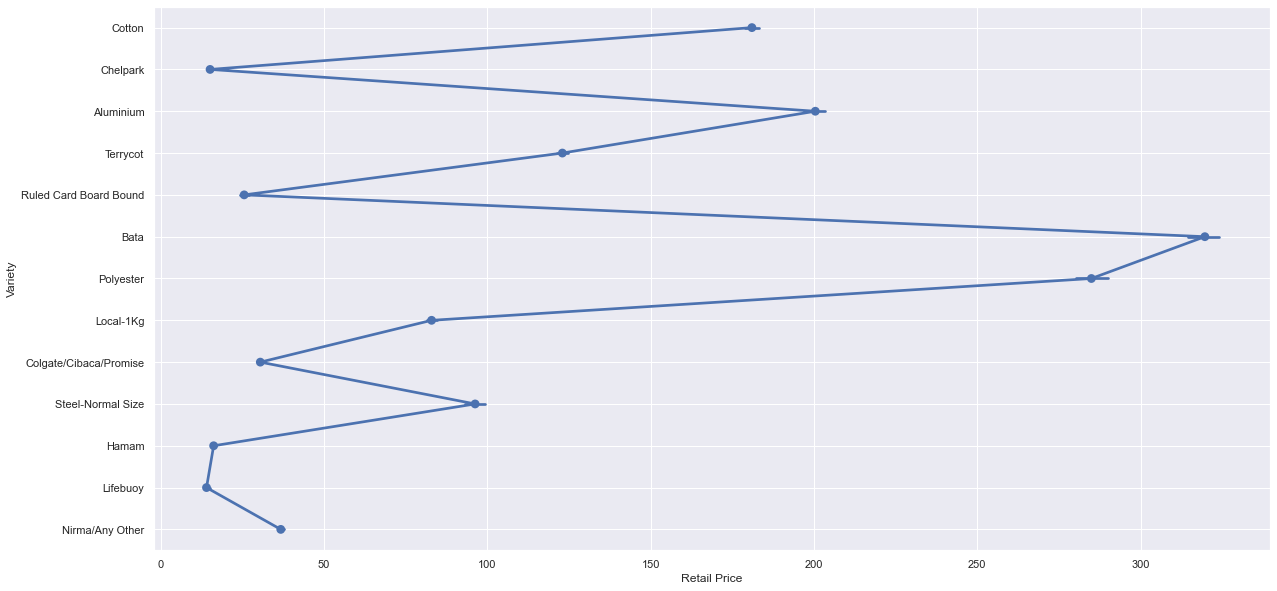

In [138]:
plt.figure(figsize=(20,10))
sns.pointplot(nonfood["Retail Price"], nonfood["Variety"])
plt.grid(True)
plt.show()

In Variety Bata had the higest Retail Price. whereas, Lifebuoy has the least price. 

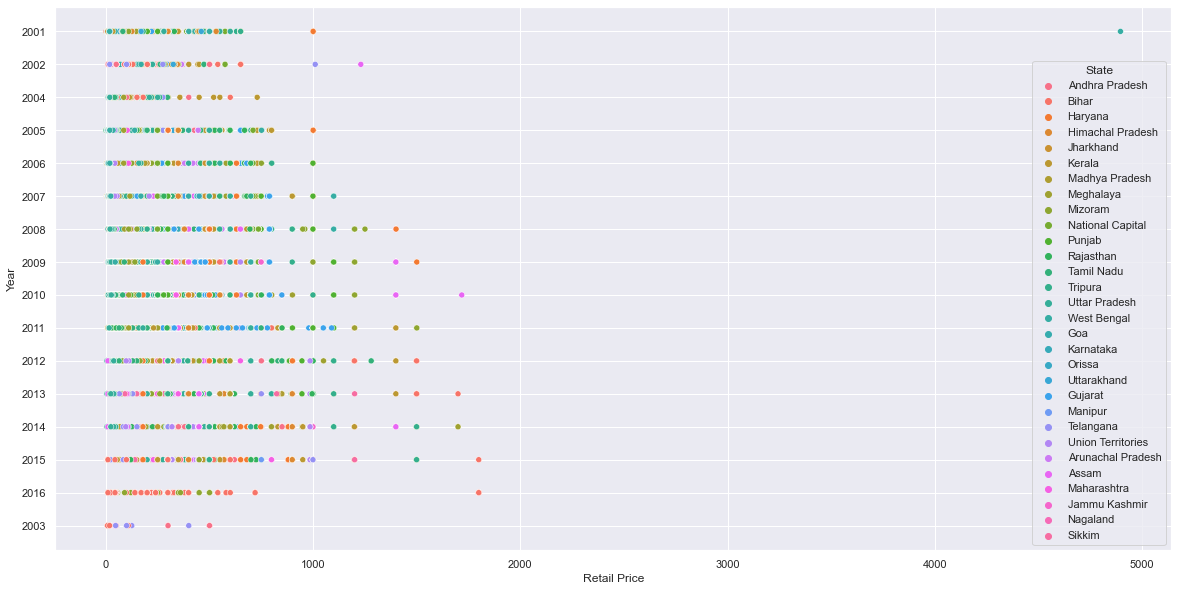

In [14]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=nonfood,y='Year',x="Retail Price",hue="State")
plt.grid(True)
plt.plot()
plt.show()

In year 2008 and 2009 higest retail price was from state National State
In year 2016 higest retail price was from state Bihar.

<AxesSubplot:xlabel='count', ylabel='Year'>

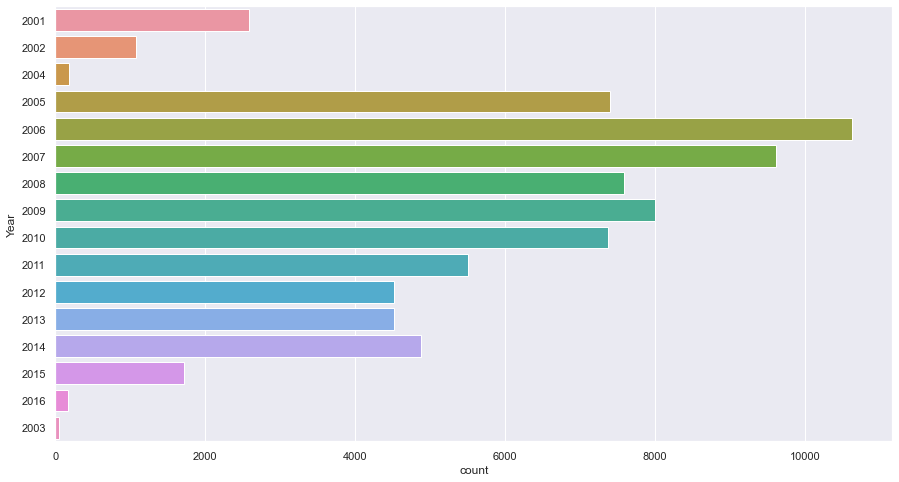

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(data=nonfood, y='Year')

In year 2006, there has been the higest sale in nonfood commodities. In year 2003 there has been the least sale. 

# Encoding

In [175]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

nonfood['State']  = lb.fit_transform(nonfood['State'])
nonfood['Centre'] = lb.fit_transform(nonfood['Centre'])
nonfood['Commodity'] = lb.fit_transform(nonfood['Commodity'])
nonfood['Variety'] = lb.fit_transform(nonfood['Variety'])
nonfood['Unit'] = lb.fit_transform(nonfood['Unit'])

In [176]:
nonfood.head()

,State,Centre,Commodity,Variety,Unit,Retail Price,Month,Year
2679,0,15,12,4,20,117.0,4,2001
2680,0,27,12,4,20,115.0,4,2001
2689,3,51,12,4,20,175.0,4,2001
2697,6,40,12,4,20,156.0,4,2001
2698,7,49,12,4,20,55.0,4,2001


# Skewness

In [79]:
from scipy.stats import skew

In [177]:
skew(nonfood['Retail Price'])

3.578841530807831

<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

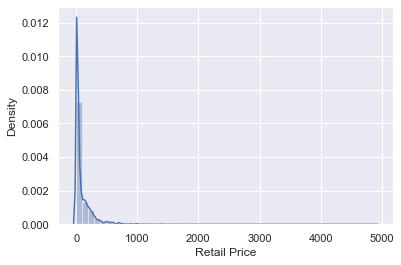

In [178]:
sns.distplot(nonfood['Retail Price'])

In [179]:
nonfood["Retail Price"]=np.sqrt(nonfood["Retail Price"])

In [180]:
skew(nonfood['Retail Price'])

1.4572235287743016

<AxesSubplot:xlabel='Year', ylabel='Density'>

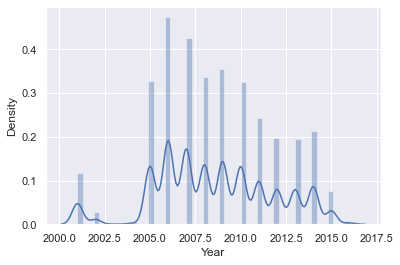

In [181]:
sns.distplot(nonfood[col])

# Model Creation

In [182]:
x = nonfood.drop(columns = ['Retail Price'])
y = nonfood['Retail Price']

In [183]:
x

,State,Centre,Commodity,Variety,Unit,Month,Year
2679,0,15,12,4,20,4,2001
2680,0,27,12,4,20,4,2001
2689,3,51,12,4,20,4,2001
2697,6,40,12,4,20,4,2001
2698,7,49,12,4,20,4,2001
...,...,...,...,...,...,...,...
697109,3,55,6,13,12,9,2016
697181,3,55,7,13,12,9,2016
697253,3,55,8,8,19,9,2016
697403,3,55,10,13,5,9,2016


In [184]:
y

2679      10.816654
2680      10.723805
2689      13.228757
2697      12.489996
2698       7.416198
            ...    
697109    15.811388
697181    17.888544
697253     6.633250
697403     3.872983
697479     6.324555
Name: Retail Price, Length: 151929, dtype: float64

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [187]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(106350, 7)
(106350,)
(45579, 7)
(45579,)


In [188]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
ypred=linreg.predict(x_test)
ypred

array([ 9.61464019, 12.3177572 ,  3.9596927 , ...,  9.92761461,
        9.23002568,  9.09513777])

In [189]:
from sklearn.model_selection import cross_val_score

c = 111111111111111111111
d = 0
for i in range(2,12):
    sc = cross_val_score(linreg, x, y, cv = i, scoring = 'neg_root_mean_squared_error')
    sc = -sc
    print(i,") ",sc.mean())
    if sc.mean()<c:
        c=sc.mean()
        d=i
print('\nBest number of kfolds for cross validation is ',d,'\n')

2 )  6.6727441384277695
3 )  5.409644888882505
4 )  5.674800276407655
5 )  5.333290467120676
6 )  5.380609646365849
7 )  5.34312293963531
8 )  5.227155837244549
9 )  5.204386406746391
10 )  5.188333177577297
11 )  5.136749307800851

Best number of kfolds for cross validation is  11 



In [191]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, x_train,y_train, cv = 11, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[4.94267017 4.94604976 4.91701006 4.96830607 4.95806004 4.9875016
 4.90642983 4.98681501 5.00191916 4.883833   4.88605219]

Model Report
CV Score : Mean - 4.944 | Std - 0.0393 | Min - 4.884 | Max - 5.002


In [190]:
from sklearn.metrics import mean_squared_error as mse
print('Mean Square Error (MSE)       :', mse(y_test,ypred))
print('Root mean Square Error (RMSE) :', np.sqrt(mse(y_test,ypred)))

Mean Square Error (MSE)       : 24.567924413828393
Root mean Square Error (RMSE) : 4.956604121152747


<AxesSubplot:xlabel='Retail Price', ylabel='Density'>

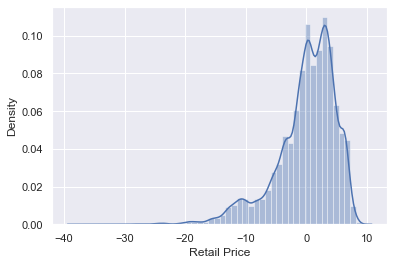

In [192]:
sns.distplot(ypred - y_test)

Text(0.5, 0.98, 'Actual and Predicted')

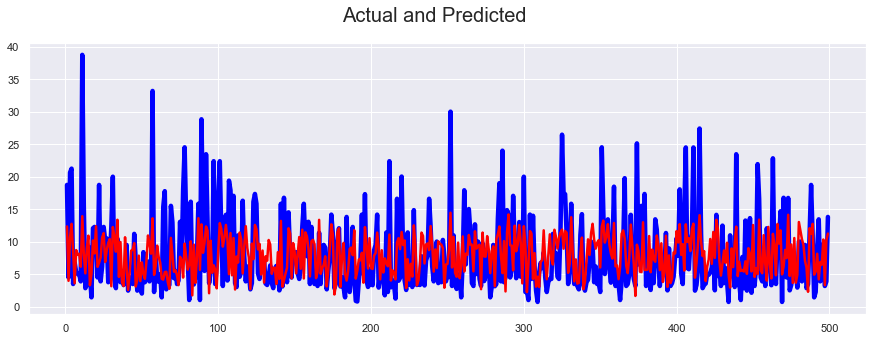

In [193]:
c = [i for i in range(1,500,1)]
fig = plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:500], color="blue", linewidth=4.5, linestyle="-")
plt.plot(c,ypred[1:500], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 

In [194]:
from sklearn.metrics import r2_score #checking for r2_score
R_square =r2_score(y_test,ypred)

print('R square :',R_square)

R square : 0.2723395888586926


In [195]:
for i in range(20):
    l2=Ridge(alpha=i)
    l2.fit(x_train,y_train)
    print(f"{i}:{l2.score(x_test,y_test)}")

0:0.2723395888586926
1:0.27233958935254876
2:0.27233958984631823
3:0.272339590340001
4:0.27233959083359716
5:0.27233959132710683
6:0.2723395918205299
7:0.2723395923138663
8:0.2723395928071163
9:0.27233959330027957
10:0.27233959379335626
11:0.27233959428634624
12:0.2723395947792496
13:0.27233959527206675
14:0.2723395957647968
15:0.27233959625744064
16:0.27233959674999775
17:0.2723395972424685
18:0.2723395977348523
19:0.2723395982271495


In [196]:
print ("RIDGE REGRESSION")
l2= Ridge(alpha = 1, normalize = True)
l2.fit(x_train,y_train)
predictions = l2.predict(x_test)

mean_square = mse(y_test,predictions)

print('Mean Square Error (MSE)       :', mse(y_test,predictions))
print('Root mean Square Error (RMSE) :', np.sqrt(mse(y_test,predictions)))

cv_score = cross_val_score(l2, x_train,y_train, cv=11, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))

RIDGE REGRESSION
Mean Square Error (MSE)       : 26.3913705059431
Root mean Square Error (RMSE) : 5.137253206329536

 Scores 
[5.12439659 5.1025275  5.09440398 5.14347024 5.13786506 5.19778739
 5.08252911 5.1552655  5.20485068 5.05285048 5.06440827]

Model Report
CV Score : Mean - 5.124 | Std - 0.04786 | Min - 5.053 | Max - 5.205


In [197]:
R_square = metrics.r2_score(y_test,predictions)
print('R square :',R_square)

# n = sample size
n = x_test.shape[0]
# k = no of independent variables
k = x_test.shape[1]
Adj_R2 = 1 - ((n-1)/(n-k-1))*(1- R_square)

print("Adjusted R square :" ,Adj_R2)

R square : 0.2183321965070878
Adjusted R square : 0.21821212728270278


In [198]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 600, max_depth = 6, min_samples_leaf = 120, n_jobs = 5)
RF.fit(x_train,y_train)
RF.pred = RF.predict(x_test)
RF.pred

print('Mean Square Error (MSE)       :', mse(y_test,RF.pred))
print('Root mean Square Error (RMSE) :', np.sqrt(mse(y_test,RF.pred)))
R_square =r2_score(y_test,RF.pred)
print('R square :',R_square)

Mean Square Error (MSE)       : 6.118686592256904
Root mean Square Error (RMSE) : 2.473597904320123
R square : 0.8187748412779872


In [200]:
cv_score = cross_val_score(RF, x_train,y_train, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
print ("\n Scores ")
print (cv_score)
#Print model report:
print ("\nModel Report")
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                         np.min(cv_score),np.max(cv_score)))


 Scores 
[2.45010904 2.4110044  2.42976013 2.4916512  2.49625811 2.45854693
 2.46562921 2.50365344 2.41856799 2.43949728]

Model Report
CV Score : Mean - 2.456 | Std - 0.03111 | Min - 2.411 | Max - 2.504


In [201]:
print('Accuracy for Random Forest',100*max(0,np.sqrt(metrics.mean_squared_error(y_test,RF.pred))))

Accuracy for Random Forest 247.35979043201232


In [202]:
# Performance metrics
errors = abs(RF.pred - y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 1.65 degrees.
Accuracy: 73.26 %.


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(max_depth= 2)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict(x_test)

In [204]:
from sklearn import metrics
mean_square = metrics.mean_squared_error(y_test,gbm_pred)

print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test,gbm_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,gbm_pred)))

Mean Square Error (MSE)       : 7.270129830058692
Root mean Square Error (RMSE) : 2.696317828086795


In [205]:
#KFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
results = cross_val_score(gbm, x_train, y_train, cv = kfold)
print("Accuracy          : " , results.mean()*100)
print("standard deviation: " , results.std()*100)

Accuracy          :  78.7376357261673
standard deviation:  0.5400124516947077
